In [11]:
import requests
import pandas as pd
import matplotlib.pyplot as plt


# Todays Stats

In [12]:
# get last day numbers
response = requests.get('https://api.corona-zahlen.org/germany')
response.raise_for_status()

jsn = response.json()
date = jsn.pop('meta')['lastUpdate']
df_hospitalization = pd.Series(jsn.pop('hospitalization'), name=date).to_frame().T
df_delta = pd.Series(jsn.pop('delta'), name=date).to_frame().T
df_r = pd.Series(jsn.pop('r'), name=date).to_frame().T
df_stats = pd.Series(jsn, name=date).to_frame().T


In [13]:
d = pd.concat([
    df_stats.astype(int).T,
    df_delta.astype(int).T
], axis=1)
d.columns = ['total', 'yesterday']
d

,total,yesterday
cases,6833050,23428.0
deaths,108814,462.0
recovered,5866886,65469.0
weekIncidence,306,NaN
casesPer100k,8217,NaN
casesPerWeek,254773,NaN


# Create History View

In [14]:
response = requests.get('https://api.corona-zahlen.org/germany/history/incidence')
response.raise_for_status()

df_incidence = (
    pd.DataFrame(response.json()['data'])
    .set_index('date')
#    .append(df_stats['weekIncidence'].to_frame())
)
df_incidence.index = pd.to_datetime(df_incidence.index)


In [15]:
# load incident history
response = requests.get('https://api.corona-zahlen.org/germany/history/cases')
response.raise_for_status()
df_cases = (
    pd.DataFrame(response.json()['data'])
    .set_index('date')
    .append(df_delta['cases'].to_frame())
)

df_cases.index = pd.to_datetime(df_cases.index)

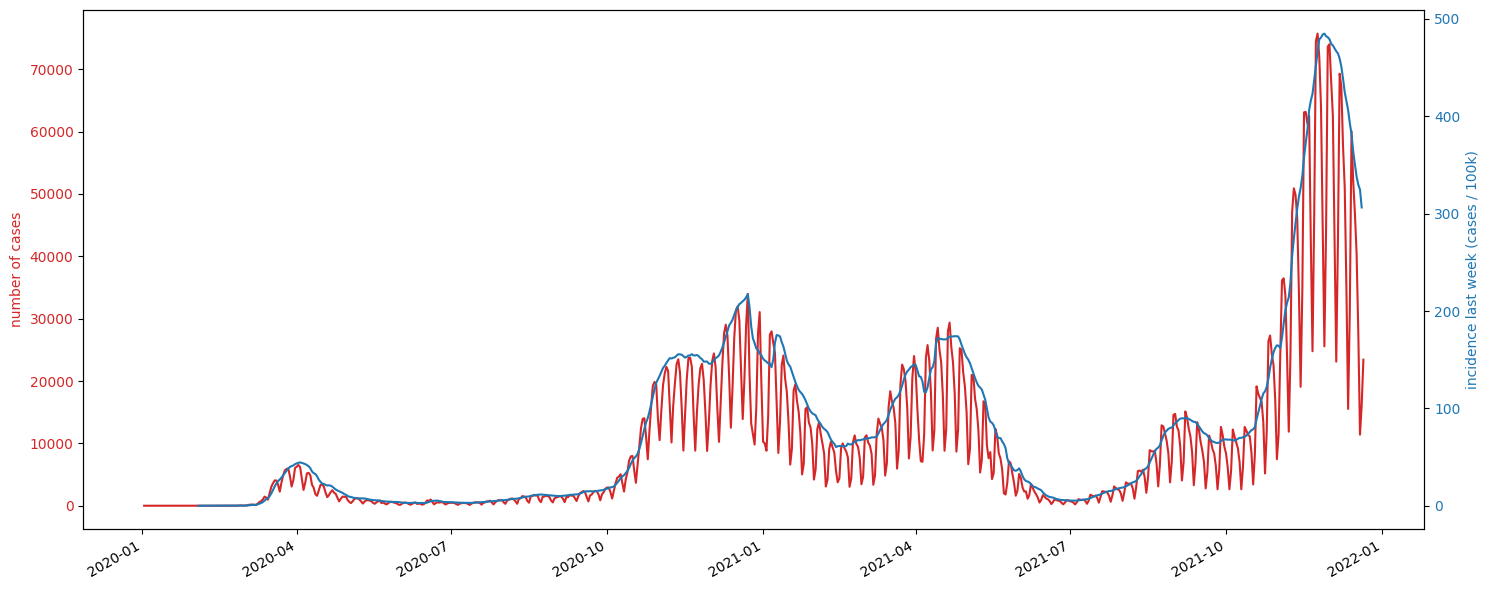

In [16]:
fig, ax1 = plt.subplots(dpi=100, figsize=(15,6))

color = 'tab:red'
ax1.set_ylabel('number of cases', color=color)
df_cases.plot(ax=ax1, color=color)
ax1.legend().remove()
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('incidence last week (cases / 100k)', color=color)
df_incidence.plot(ax=ax2, color=color)
ax2.legend().remove()
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

Cases: 23428
Change compared to last week: -61.00%


2021-12-14 00:00:00+00:00    60069
2021-12-15 00:00:00+00:00    52029
2021-12-16 00:00:00+00:00    46881
2021-12-17 00:00:00+00:00    40445
2021-12-18 00:00:00+00:00    27811
2021-12-19 00:00:00+00:00    11396
2021-12-20 00:00:00+00:00    16142
2021-12-21 00:00:00+00:00    23428
Name: cases, dtype: int64

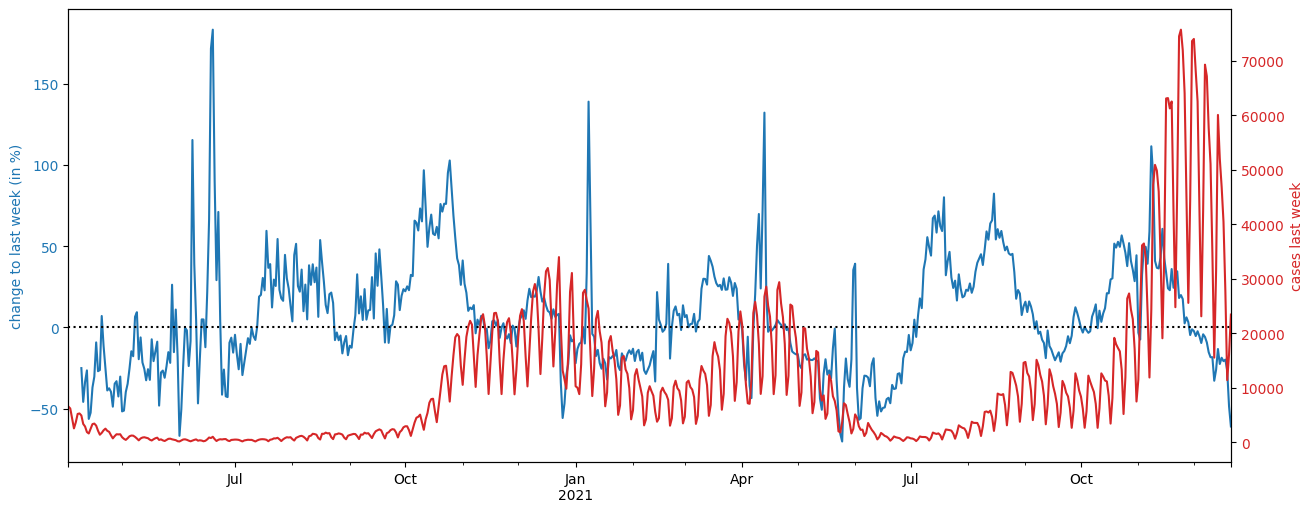

In [17]:
d = df_cases[df_cases.index>'2020-04-01']
fig, ax1 = plt.subplots(dpi=100, figsize=(15,6))

color = 'tab:blue'
(100*d.pct_change(7)).plot(ax=ax1, c=color)
ax1.legend().remove()
ax1.set_ylabel('change to last week (in %)', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.axhline(y=0, color='k', linestyle=':')

color = 'tab:red'
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
d.plot(ax=ax2, label='inc', c=color)
ax2.legend().remove()
ax2.set_ylabel('cases last week', color=color)
ax2.tick_params(axis='y', labelcolor=color)

print(f'Cases: {d.iloc[-1].cases}')
print(f'Change compared to last week: {d.pct_change(7).iloc[-1].cases:0.2%}')
d.iloc[-8:].cases

Incidence: 306.38314595781947
Change compared to last week: -22.04%


date
2021-12-13 00:00:00+00:00    393.000876
2021-12-14 00:00:00+00:00    381.907139
2021-12-15 00:00:00+00:00    363.707399
2021-12-16 00:00:00+00:00    350.750876
2021-12-17 00:00:00+00:00    337.985563
2021-12-18 00:00:00+00:00    329.704645
2021-12-19 00:00:00+00:00    324.741626
2021-12-20 00:00:00+00:00    306.383146
Name: weekIncidence, dtype: float64

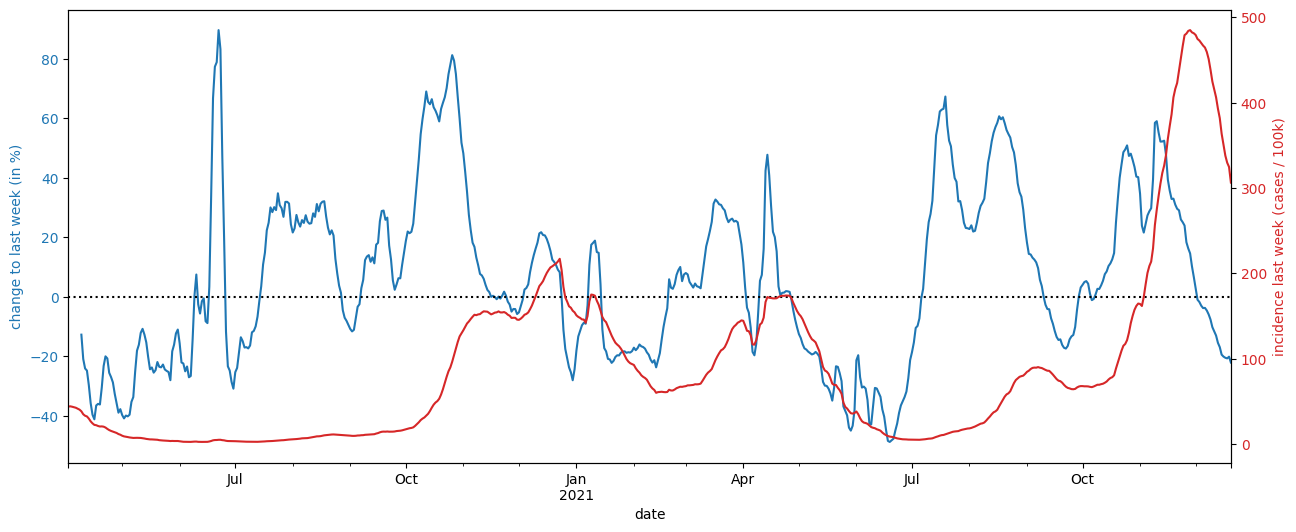

In [18]:
d = df_incidence[df_incidence.index>'2020-04-01']
fig, ax1 = plt.subplots(dpi=100, figsize=(15,6))

color = 'tab:blue'
(100*d.pct_change(7)).plot(ax=ax1, c=color)
ax1.legend().remove()
ax1.set_ylabel('change to last week (in %)', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.axhline(y=0, color='k', linestyle=':')

color = 'tab:red'
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
d.plot(ax=ax2, label='inc', c=color)
ax2.legend().remove()
ax2.set_ylabel('incidence last week (cases / 100k)', color=color)
ax2.tick_params(axis='y', labelcolor=color)

print(f'Incidence: {d.iloc[-1].weekIncidence}')
print(f'Change compared to last week: {d.pct_change(7).iloc[-1].weekIncidence:0.2%}')
d.iloc[-8:].weekIncidence

<AxesSubplot:xlabel='date'>

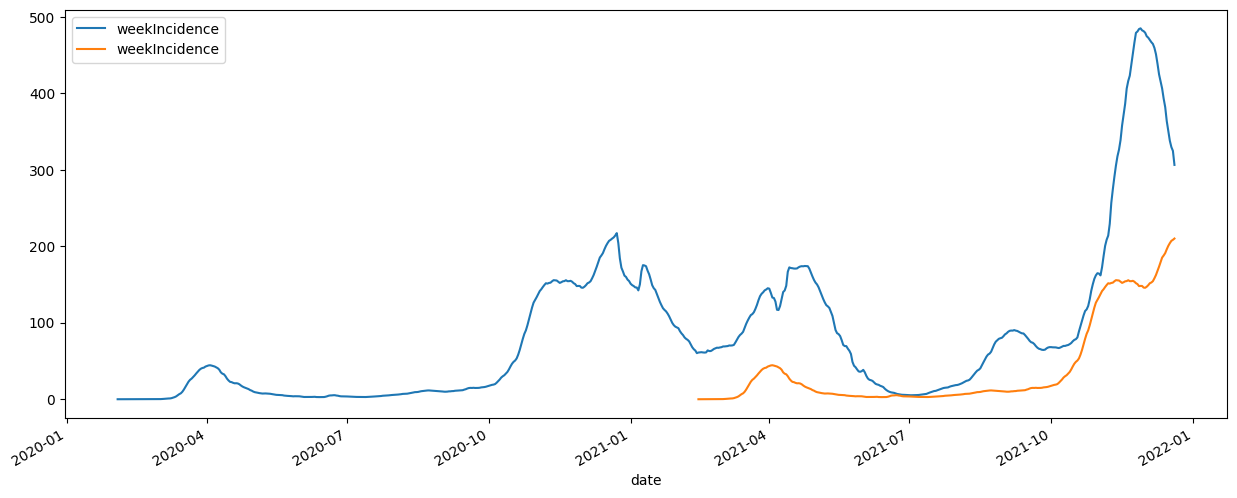

In [19]:
fig, ax = plt.subplots(dpi=100, figsize=(15,6))
df_incidence.plot(ax=ax)
df_incidence.shift(365).plot(ax=ax)

# Appendix

In [ ]:
import oscovida as ov

country = "Germany"
region="Berlin"
cases, deaths = ov.get_country_data(country, region)

ov.overview(country=country, region=region);